# CNN
Redes Neuronales

In [14]:
import tensorflow as tf
from keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

In [15]:
# Directorio donde se encuentran las imágenes
data_dir = 'D:\\U\\7. Septimo\\RI\\ir24a\\week14\\caltech-101'

In [16]:
# Cargar las imágenes desde el directorio
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

Found 9144 files belonging to 102 classes.
Using 7316 files for training.
Found 9144 files belonging to 102 classes.
Using 1828 files for validation.


In [17]:
# Obtener el número de clases
class_names = train_dataset.class_names
num_classes = len(class_names)

In [18]:
# Preprocesar las imágenes (opcional, si es necesario)
def preprocess_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset.map(preprocess_image)
test_dataset = test_dataset.map(preprocess_image)

In [19]:
# Definir el modelo
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [20]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# Entrenar el modelo
model.fit(train_dataset, epochs=10, validation_data=test_dataset)

# Evaluar el modelo
loss, accuracy = model.evaluate(test_dataset)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

Epoch 1/10
229/229 [==============================] - 264s 1s/step - loss: 3.5328 - accuracy: 0.3040 - val_loss: 2.7227 - val_accuracy: 0.4469
Epoch 2/10
229/229 [==============================] - 299s 1s/step - loss: 1.7920 - accuracy: 0.5893 - val_loss: 2.5478 - val_accuracy: 0.4792
Epoch 3/10
229/229 [==============================] - 296s 1s/step - loss: 0.5785 - accuracy: 0.8593 - val_loss: 3.4748 - val_accuracy: 0.4606
Epoch 4/10
229/229 [==============================] - 304s 1s/step - loss: 0.1688 - accuracy: 0.9635 - val_loss: 3.5928 - val_accuracy: 0.4754
Epoch 5/10
229/229 [==============================] - 308s 1s/step - loss: 0.1042 - accuracy: 0.9788 - val_loss: 4.2537 - val_accuracy: 0.4431
Epoch 6/10
229/229 [==============================] - 315s 1s/step - loss: 0.0764 - accuracy: 0.9850 - val_loss: 4.3039 - val_accuracy: 0.4655
Epoch 7/10
229/229 [==============================] - 320s 1s/step - loss: 0.0776 - accuracy: 0.9840 - val_loss: 4.6054 - val_accuracy: 0.4535

In [22]:
# Mostrar imágenes mal clasificadas
misclassified_images = []
misclassified_labels = []
true_labels = []

In [23]:
for image, label in test_dataset.unbatch():
    image = tf.expand_dims(image, axis=0)  # Expandir dimensiones para la predicción
    prediction = model.predict(image)
    predicted_label = np.argmax(prediction, axis=1)[0]
    true_label = label.numpy()
    if predicted_label != true_label:
        misclassified_images.append(image[0])
        misclassified_labels.append(predicted_label)
        true_labels.append(true_label)

1/1 [==============================] - 0s 43ms/step


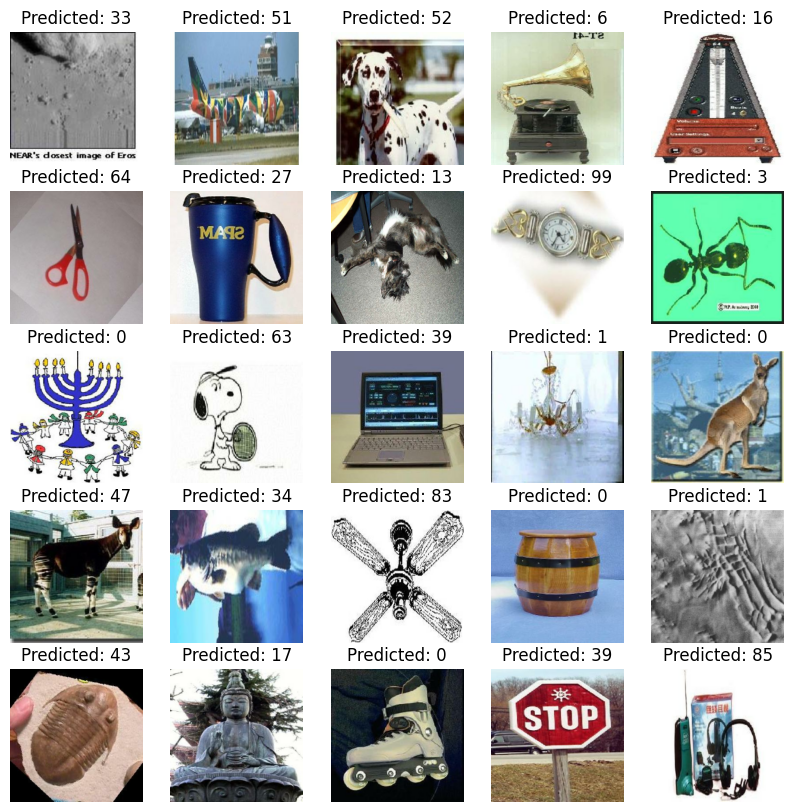

In [24]:
# Visualizar las imágenes mal clasificadas
plt.figure(figsize=(10, 10))
for i in range(min(25, len(misclassified_images))):
    plt.subplot(5, 5, i+1)
    plt.imshow(misclassified_images[i])
    plt.title(f"Predicted: {misclassified_labels[i]}")
    plt.axis('off')
plt.show()

In [25]:
# Función para mostrar imágenes por categoría
def mostrar_imagenes_por_categoria(categoria):
    if categoria not in class_names:
        print(f"La categoría {categoria} no existe en el dataset.")
        return

    categoria_index = class_names.index(categoria)
    imagenes_categoria = []

    for image, label in test_dataset.unbatch():
        if label.numpy() == categoria_index:
            imagenes_categoria.append(image)

    if not imagenes_categoria:
        print(f"No se encontraron imágenes para la categoría {categoria}.")
        return

    plt.figure(figsize=(10, 10))
    for i in range(min(25, len(imagenes_categoria))):
        plt.subplot(5, 5, i + 1)
        plt.imshow(imagenes_categoria[i])
        plt.title(f"{categoria}")
        plt.axis('off')
    plt.show()

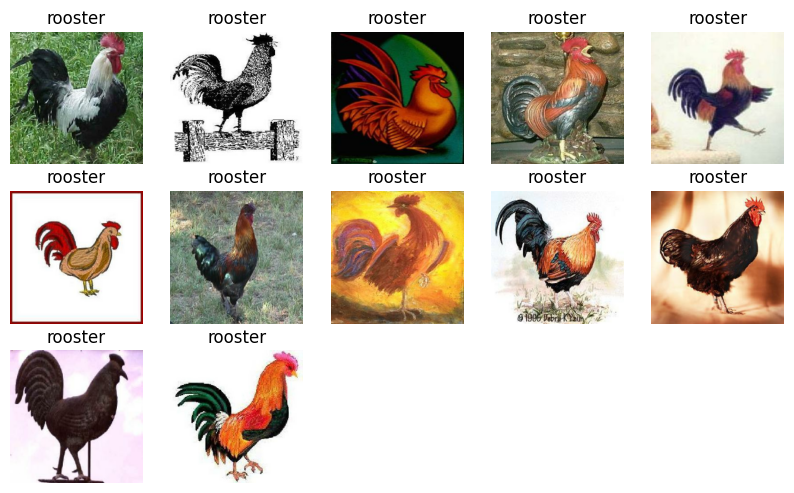

In [36]:
# Llamar a la función con el nombre de la categoría deseada
mostrar_imagenes_por_categoria("rooster")  